('file_number -', 0)
('file_number -', 1)
('file_number -', 2)
('file_number -', 3)
('file_number -', 4)
('file_number -', 5)
('file_number -', 6)
('file_number -', 7)
('file_number -', 8)
('file_number -', 9)
('file_number -', 10)
('file_number -', 11)
('file_number -', 12)
('file_number -', 13)
('file_number -', 14)
('file_number -', 15)
('file_number -', 16)
('file_number -', 17)
('file_number -', 18)
('file_number -', 19)
('file_number -', 20)
('file_number -', 21)
('file_number -', 22)
('file_number -', 23)
('file_number -', 24)
('file_number -', 25)
('file_number -', 26)
('file_number -', 27)
('file_number -', 28)
('file_number -', 29)
('file_number -', 30)
('file_number -', 31)
('file_number -', 32)
('file_number -', 33)
('file_number -', 34)
('file_number -', 35)
('file_number -', 36)
('file_number -', 37)
('file_number -', 38)
('file_number -', 39)
('file_number -', 40)
('file_number -', 41)
('file_number -', 42)
('file_number -', 43)
('file_number -', 44)
('file_number -', 45

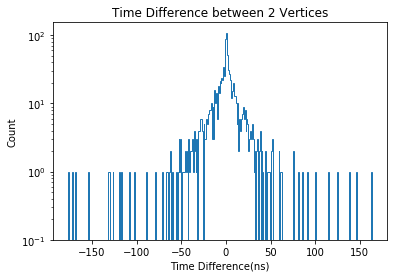

In [11]:
from icecube import dataclasses, dataio, icetray
from icecube.icetray import I3Units
from icecube.icetray import OMKey
import matplotlib.pyplot as plt
import scipy.constants as spc
import numpy as np

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo

timeDiff = ([])
fv = ([])
sv = ([])

for file_num in range(0, 200):
    file = dataio.I3File('/data/p-one/akatil/step_1_medium_water/step_1_'+str(file_num)+'_PONE_Phase1_NuTau_NuE.i3.gz')
    for frame in file:
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        if lepton.type == 15 or lepton.type == -15:
            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z

            for td in range(0, len(tau_daughters)):
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    #print(tau_daughters[td])
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z

            for i in omgeo.keys():
                oKey = omgeo.get(i)
                domPos = oKey.position
                x_dom = domPos.x
                y_dom = domPos.y
                z_dom = domPos.z

                firstVertex = np.sqrt((x_dom - x_tau_pos)**2 + (y_dom - y_tau_pos)**2 + (z_dom - z_tau_pos)**2)
                secondVertex = np.sqrt((x_dom - x_td_pos)**2 + (y_dom - y_td_pos)**2 + (z_dom - z_td_pos)**2)
                refractiveIndex = 1.333
                speed_of_light_water = (spc.c)/refractiveIndex #[Units: m/seconds]
                speed_of_light_ns = speed_of_light_water
                #print(firstVertex-secondVertex)
                tDiff_ns = ((firstVertex - secondVertex)/speed_of_light_water) * 1e9 #[Units: nanoseconds]
                timeDiff = np.append(timeDiff, tDiff_ns)
                fv = np.append(fv, firstVertex)
                sv = np.append(sv, secondVertex)
                #print(tDiff_ns)

    print('file_number -', file_num)

#Imposing Distance Limits
newTimeDiff = timeDiff[(fv <= 100.) & (sv <= 100.)]

bins = np.arange(min(newTimeDiff), max(newTimeDiff)+1, 1)
plt.hist(newTimeDiff,  bins = bins, histtype = 'step', log=True)
plt.title('Time Difference between 2 Vertices')
plt.xlabel('Time Difference(ns)')
plt.ylabel('Count')
#plt.savefig('/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/timeDiff_vertices.pdf', dpi=200)
#plt.clf()

#plt.hist(fv[(fv <= 100.) & (sv <= 100.)], bins=500, histtype='step', label = 'First Vertex')
#plt.hist(sv[(fv <= 100.) & (sv <= 100.)], bins=500, histtype='step', label = 'Second Vertex')
#plt.title('Distance to DOM')
#plt.xlabel('Distance(m)')
#plt.ylabel('Count')
#plt.legend()
#plt.savefig('/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/distance_vertices.pdf', dpi=200)
#plt.clf()

('file_number -', 0)
('file_number -', 1)
('file_number -', 2)
('file_number -', 3)
('file_number -', 4)
('file_number -', 5)
('file_number -', 6)
('file_number -', 7)
('file_number -', 8)
('file_number -', 9)
('file_number -', 10)
('file_number -', 11)
('file_number -', 12)
('file_number -', 13)
('file_number -', 14)
('file_number -', 15)
('file_number -', 16)
('file_number -', 17)
('file_number -', 18)
('file_number -', 19)
('file_number -', 20)
('file_number -', 21)
('file_number -', 22)
('file_number -', 23)
('file_number -', 24)
('file_number -', 25)
('file_number -', 26)
('file_number -', 27)
('file_number -', 28)
('file_number -', 29)
('file_number -', 30)
('file_number -', 31)
('file_number -', 32)
('file_number -', 33)
('file_number -', 34)
('file_number -', 35)
('file_number -', 36)
('file_number -', 37)
('file_number -', 38)
('file_number -', 39)
('file_number -', 40)
('file_number -', 41)
('file_number -', 42)
('file_number -', 43)
('file_number -', 44)
('file_number -', 45

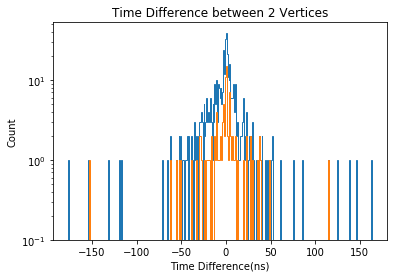

In [16]:
from icecube import dataclasses, dataio, icetray
from icecube.icetray import I3Units
from icecube.icetray import OMKey
import matplotlib.pyplot as plt
import scipy.constants as spc
import numpy as np

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo

timeDiff = ([])
fv = ([])
sv = ([])

for file_num in range(0, 100):
    file = dataio.I3File('/data/p-one/akatil/step_1_medium_water/step_1_'+str(file_num)+'_PONE_Phase1_NuTau_NuE.i3.gz')
    for frame in file:
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        if lepton.type == 15 or lepton.type == -15:
            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z

            for td in range(0, len(tau_daughters)):
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    #print(tau_daughters[td])
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z

            for i in omgeo.keys():
                oKey = omgeo.get(i)
                domPos = oKey.position
                x_dom = domPos.x
                y_dom = domPos.y
                z_dom = domPos.z

                firstVertex = np.sqrt((x_dom - x_tau_pos)**2 + (y_dom - y_tau_pos)**2 + (z_dom - z_tau_pos)**2)
                secondVertex = np.sqrt((x_dom - x_td_pos)**2 + (y_dom - y_td_pos)**2 + (z_dom - z_td_pos)**2)
                refractiveIndex = 1.333
                speed_of_light_water = (spc.c)/refractiveIndex #[Units: m/seconds]
                speed_of_light_ns = speed_of_light_water
                #print(firstVertex-secondVertex)
                tDiff_ns = ((firstVertex - secondVertex)/speed_of_light_water) * 1e9 #[Units: nanoseconds]
                timeDiff = np.append(timeDiff, tDiff_ns)
                fv = np.append(fv, firstVertex)
                sv = np.append(sv, secondVertex)
                #print(tDiff_ns)

    print('file_number -', file_num)

#Imposing Distance Limits
newTimeDiff = timeDiff[(fv <= 100.) & (sv <= 100.)]
newTimeDiff2 = timeDiff[(fv <= 60.) & (sv <= 60.)]

bins = np.arange(min(newTimeDiff), max(newTimeDiff)+1, 1)
plt.hist(newTimeDiff,  bins = bins, histtype = 'step', log=True)
plt.title('Time Difference between 2 Vertices')
plt.xlabel('Time Difference(ns)')
plt.ylabel('Count')

bins = np.arange(min(newTimeDiff2), max(newTimeDiff2)+1, 1)
plt.hist(newTimeDiff2,  bins = bins, histtype = 'step', log=True)
plt.title('Time Difference between 2 Vertices')
plt.xlabel('Time Difference(ns)')
plt.ylabel('Count')
#plt.savefig('/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/timeDiff_vertices.pdf', dpi=200)
#plt.clf()

#plt.hist(fv[(fv <= 100.) & (sv <= 100.)], bins=500, histtype='step', label = 'First Vertex')
#plt.hist(sv[(fv <= 100.) & (sv <= 100.)], bins=500, histtype='step', label = 'Second Vertex')
#plt.title('Distance to DOM')
#plt.xlabel('Distance(m)')
#plt.ylabel('Count')
#plt.legend()
#plt.savefig('/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/distance_vertices.pdf', dpi=200)
#plt.clf()

In [9]:
newTimeDiff.shape

(37,)

In [1]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import scipy.constants as spc
import scipy as sc
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2

In [2]:
import scipy

def gaussian(x, pos, wid, amp):
    y = amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)
    return y

def biGauss(x, pos, wid, r, amp):
    mask = x < pos
    
    y_all = ([])
    for i in range(0, len(mask)):
    
        if mask[i] == True:
            m = 1
            nm = 0
        else:
            m = 0
            nm = 1
        if r != 0:
            y1 = gaussian(x[i],pos,r*wid/(r+1),amp)*m
            y2 = gaussian(x[i],pos,wid/(r+1),amp)*nm
            y = y1 + y2
        else:
            y = gaussian(x[i],pos,wid)*nm
        
        y_all = np.append(y_all, y)
    return y_all
    
def double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    b1 = biGauss(x, pos1, wid1, r1, amp1)
    b2 = biGauss(x, pos2, wid2, r2, amp2)
    b = np.append(b1, b2)
    return b1+b2

def log_likelihood_biGauss(theta, n, x):
    pos, wid, r, amp = theta
    model = biGauss(x, pos, wid, r, amp)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    return np.sum(L)

def log_likelihood_doublePeak(theta, n, x):
    pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    return np.sum(L)
    
def likelihood_ratio_doublePeak(x, n, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

def likelihood_ratio_biGauss(x, n, pos, wid, r, amp):
    model = biGauss(x, pos, wid, r, amp)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)



loaded geometry
('frame num - ', 1)
('frame num - ', 2)
('frame num - ', 3)
LOG LIKELIHOOD


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log


P-VAL CALCULATED
('frame num - ', 4)
('frame num - ', 4)
('frame num - ', 5)
('frame num - ', 6)
('frame num - ', 7)
('frame num - ', 8)
('frame num - ', 8)
('frame num - ', 9)
('frame num - ', 10)
('frame num - ', 11)
LOG LIKELIHOOD


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log


LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply


P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 12)
('frame num - ', 1)
('frame num - ', 2)
('frame num - ', 2)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 3)
LOG LIKELIHOOD
LOG LIKELIHOOD
Error in amp
('frame num - ', 4)
('frame num - ', 5)
('frame num - ', 6)
('frame num - ', 7)
('frame num - ', 8)
('frame num - ', 8)
('frame num - ', 9)
('frame num - ', 10)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 11)
('frame num - ', 12)
('frame num - ', 13)
('frame num - ', 14)
('frame num - ', 15)
('frame num - ', 15)
('frame num - ', 1)
('frame num - ', 1)
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 2)
LOG LIKELIHOOD


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 3)
('frame num - ', 4)
('frame num - ', 5)
('frame num - ', 6)
('frame num - ', 7)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 8)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 9)
('frame num - ', 10)
('frame num - ', 10)
('frame num - ', 10)
('frame num - ', 11)
('frame num - ', 12)
('frame num - ', 13)
('frame num - ', 14)
('frame num - ', 1)
('frame num - ', 2)
('frame num - ', 3)
('frame num - ', 4)
('frame num - ', 4)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
Error in amp
('frame num - ', 5)
('frame num - ', 5)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 6)
('frame num - ', 7)
('frame num - ', 8)
LOG LIKELIHOOD
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
('frame num - ', 9)
('frame num - ', 9)
('frame num - ', 10)
('frame num - ', 11)
('frame num - ', 12)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 2)
('frame num - ', 3)
('frame num - ', 3)
('frame num - ', 4)
('frame num - ', 5)
('frame num - ', 5)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CAL

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 11)
('frame num - ', 12)
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 13)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 14)
('frame num - ', 15)
('frame num - ', 16)
('frame num - ', 16)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 2)
('frame num - ', 3)
('frame num - ', 3)
LOG LIKELIHOOD
('frame num - ', 4)
('frame num - ', 5)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 6)
('frame num - ', 7)
('frame num - ', 8)
('frame num - ', 9)
('frame num - ', 9)
('frame num - ', 10)
('frame num - ', 11)
('frame num - ', 12)
('frame num - ', 13)
('frame num - ', 1)
('frame num - ', 2)
('frame num - ', 3)
('frame num - ', 4)
('frame num - ', 5)
LOG LIKELIHOOD
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATE

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:1849: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:2439: RuntimeWarning: invalid value encountered in double_scalars
  if (fx2 - fval) > delta:
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:2448: RuntimeWarning: invalid value encountered in double_scalars
  if 2.0 * (fx - fval) <= bnd:


LOG LIKELIHOOD
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 11)
('frame num - ', 12)
LOG LIKELIHOOD
P-VAL CALCULATED
LOG LIKELIHOOD
P-VAL CALCULATED
('frame num - ', 13)
('frame num - ', 13)
('frame num - ', 14)


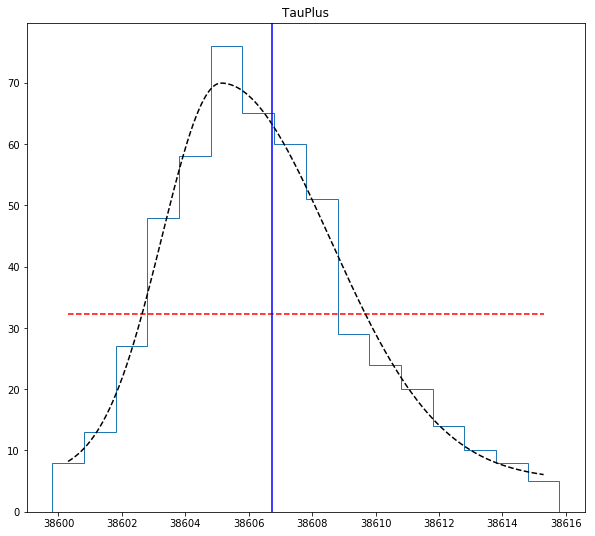

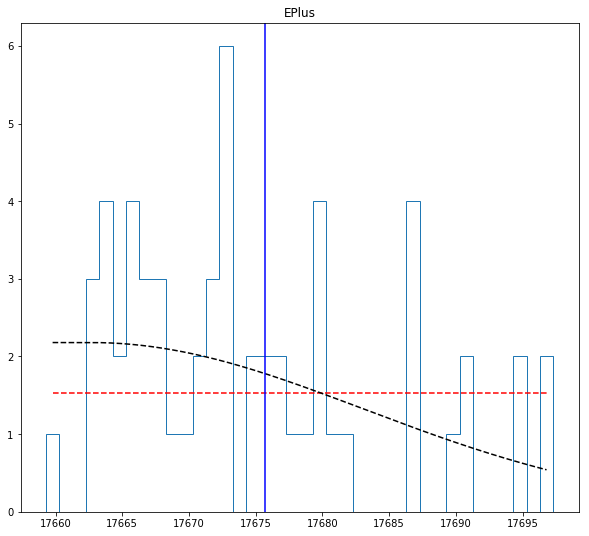

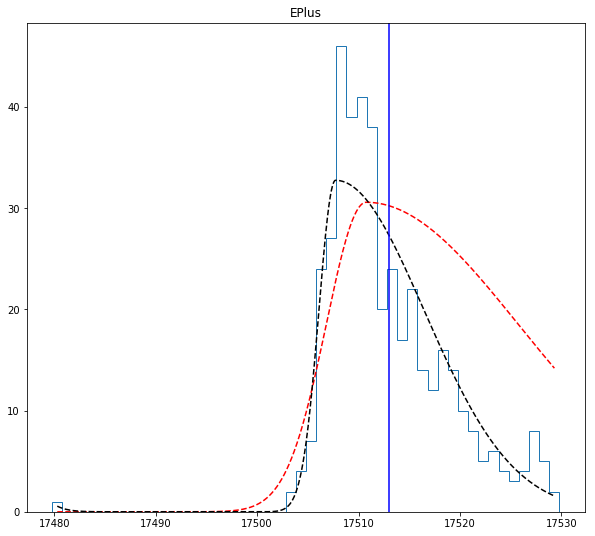

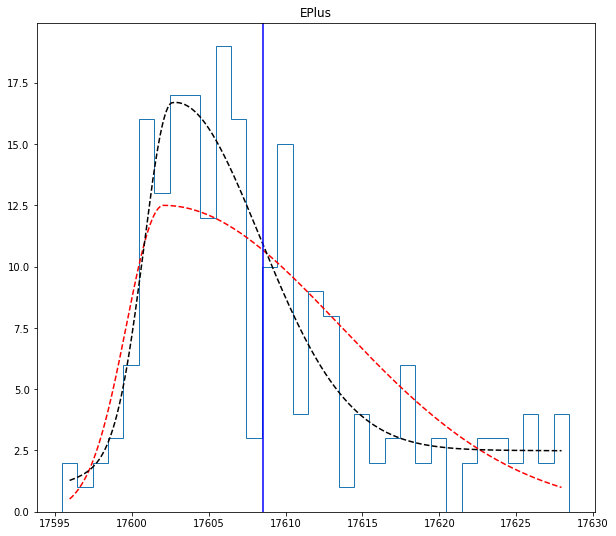

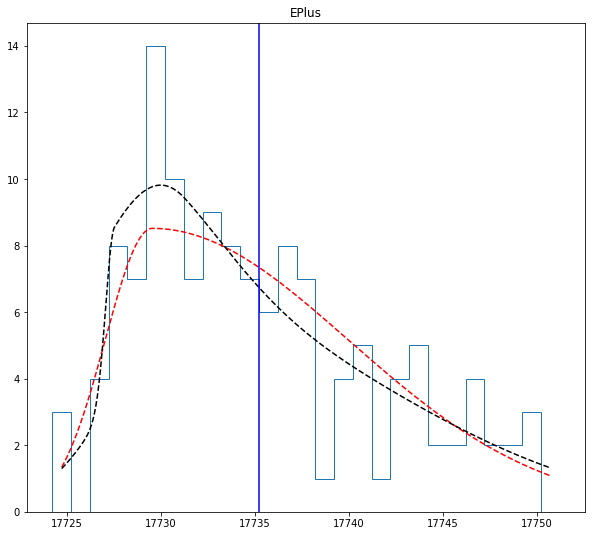

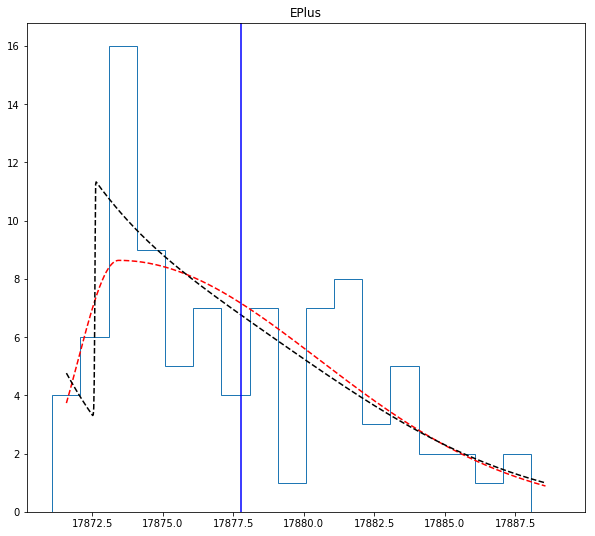

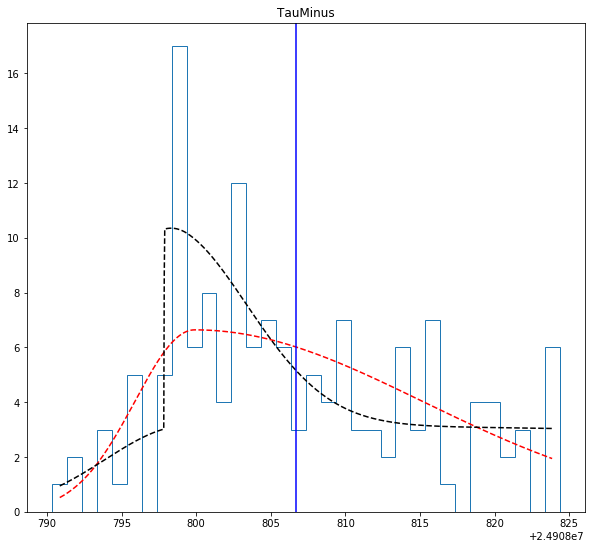

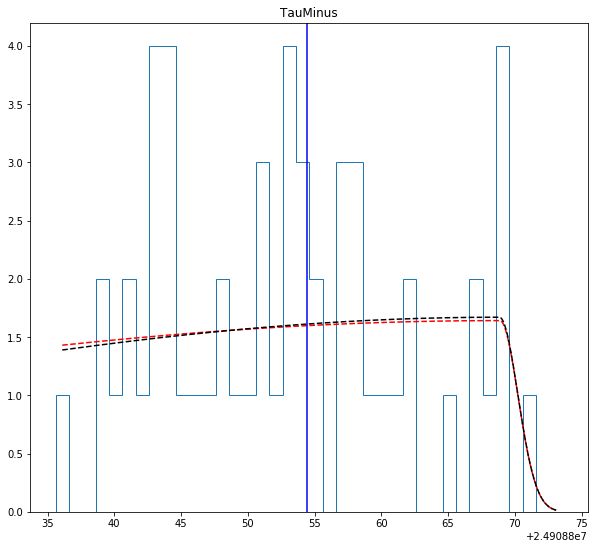

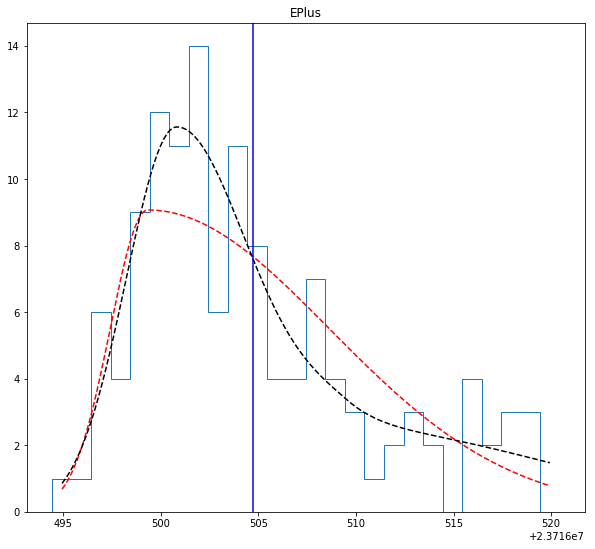

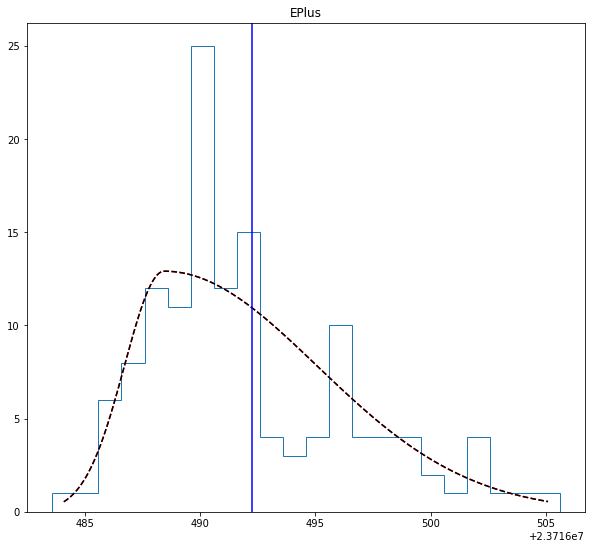

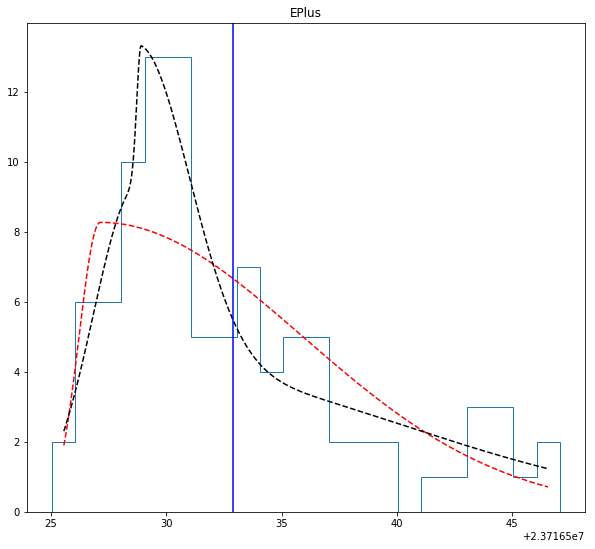

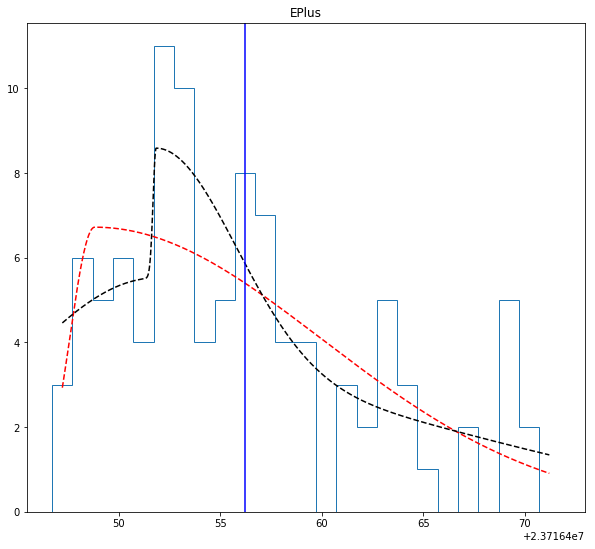

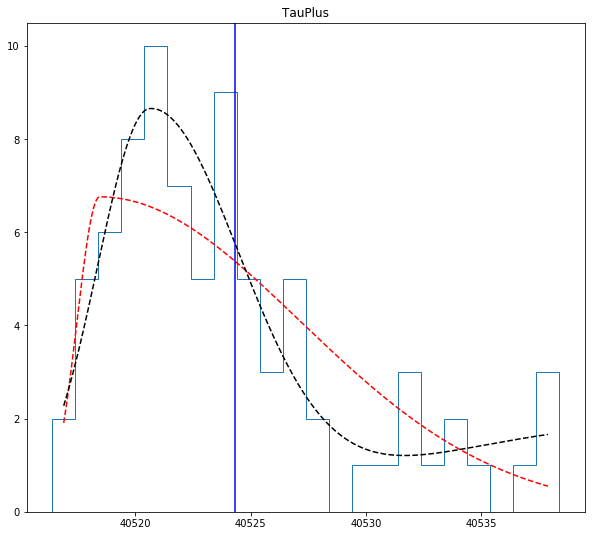

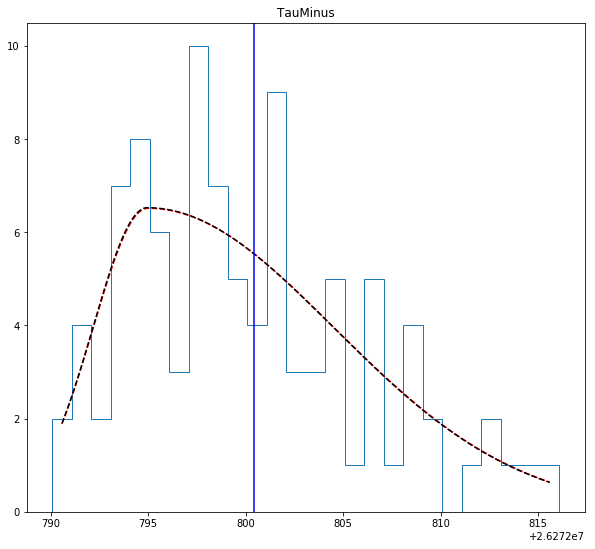

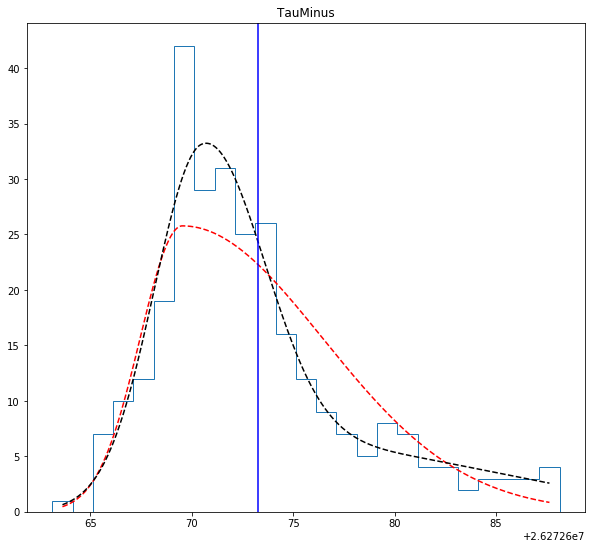

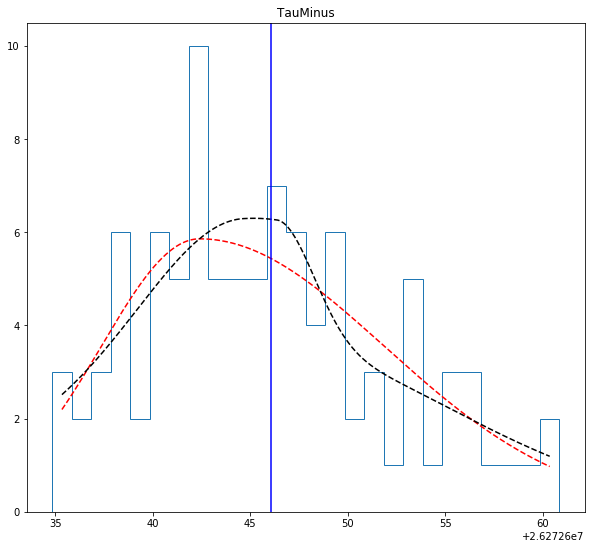

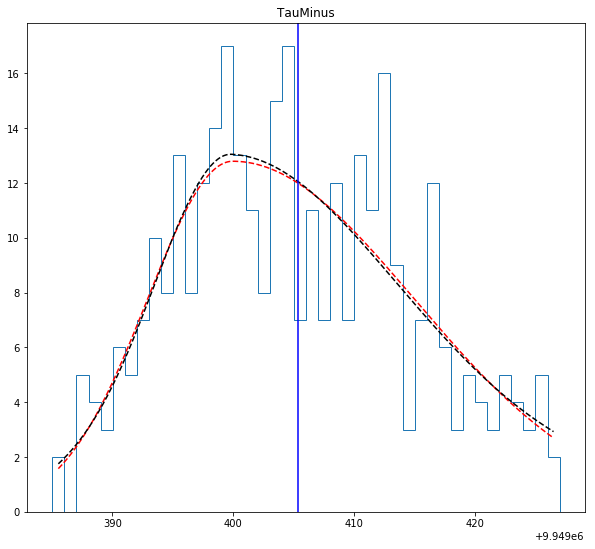

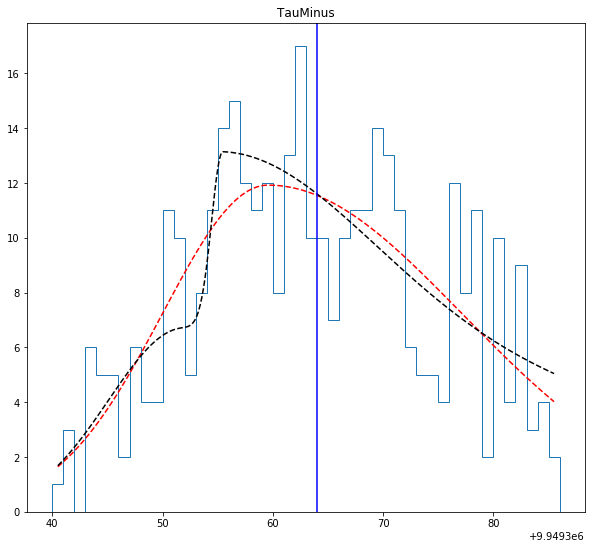

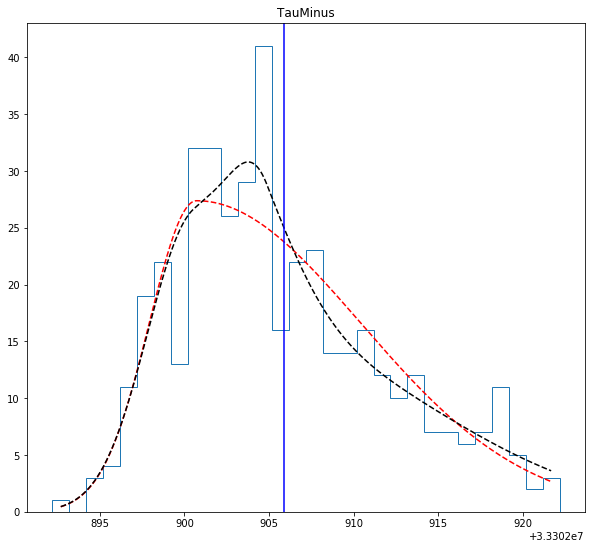

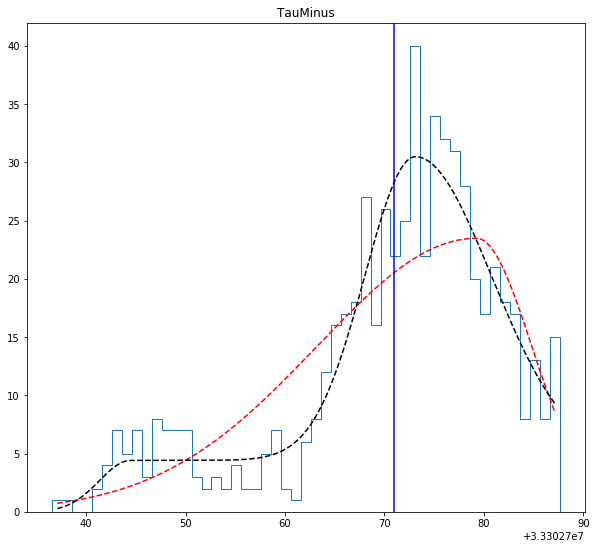

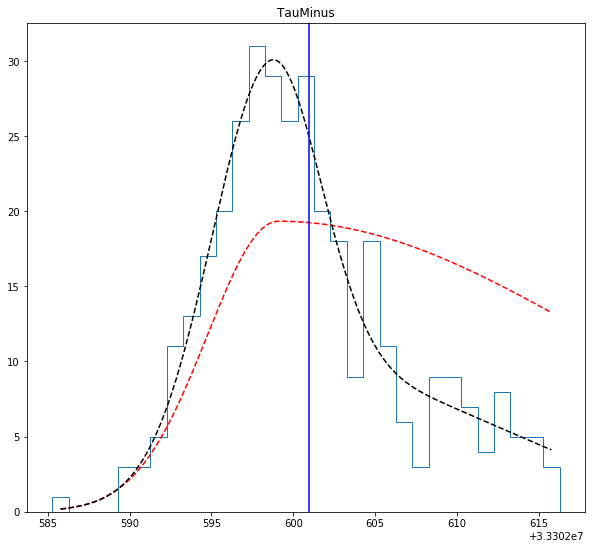

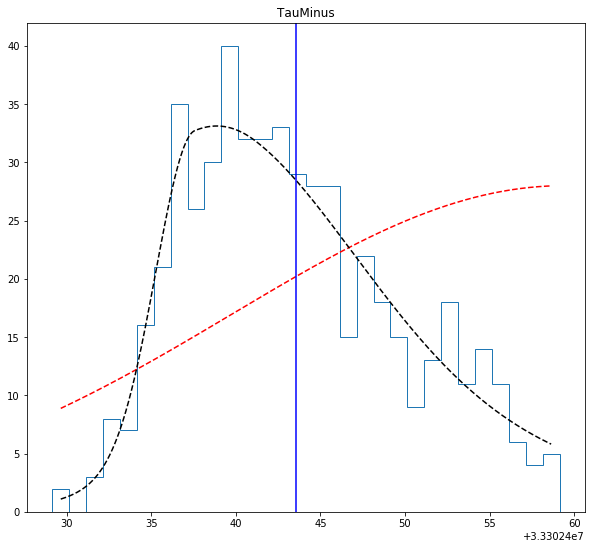

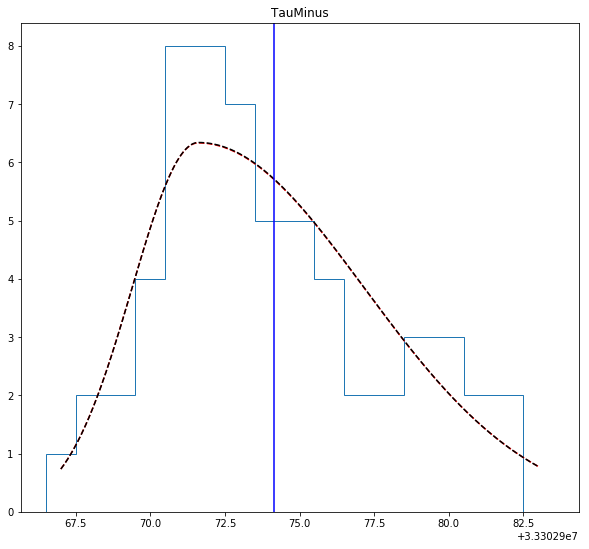

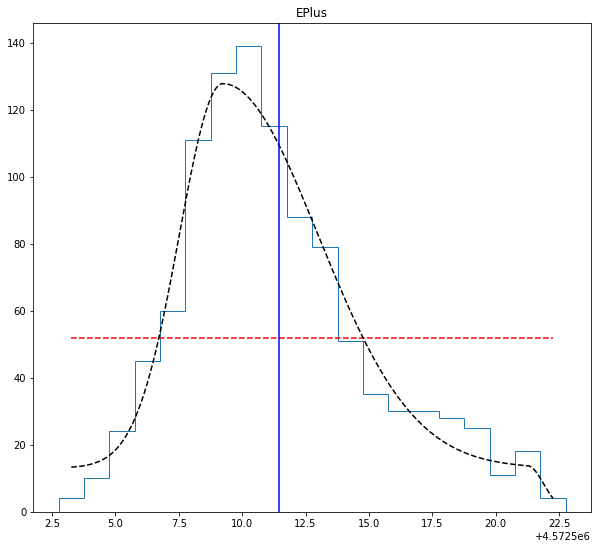

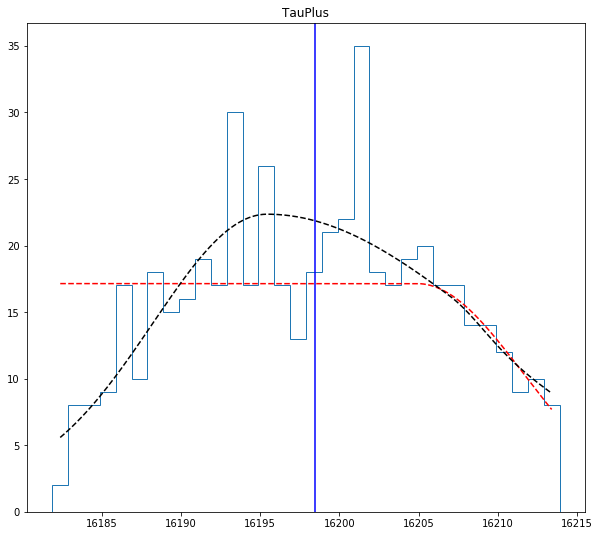

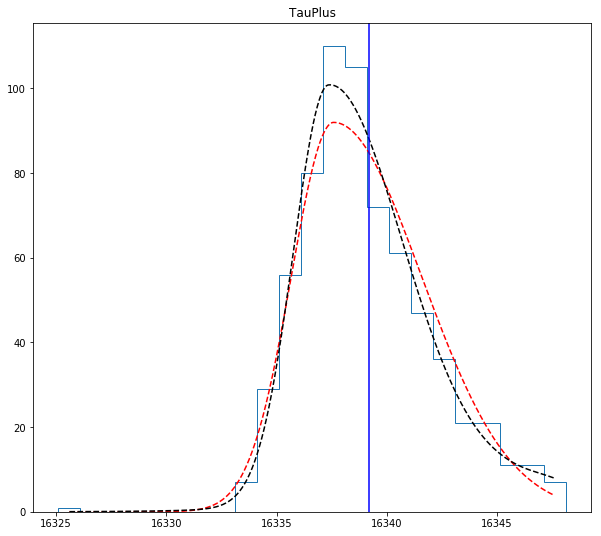

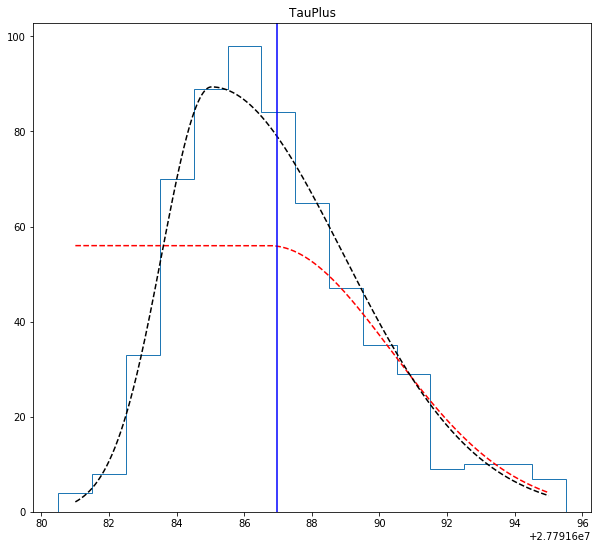

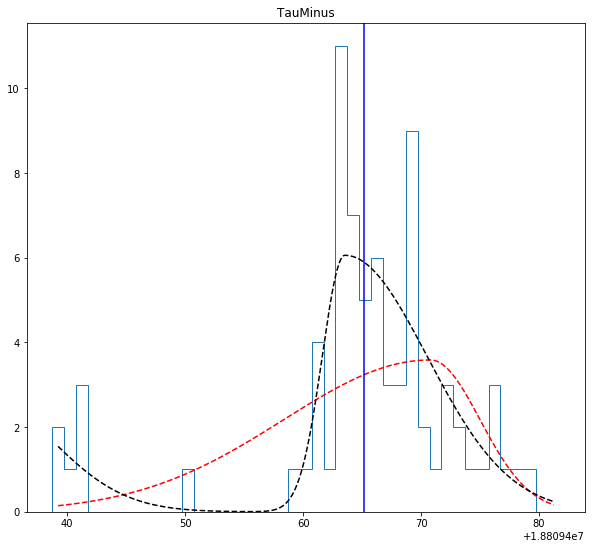

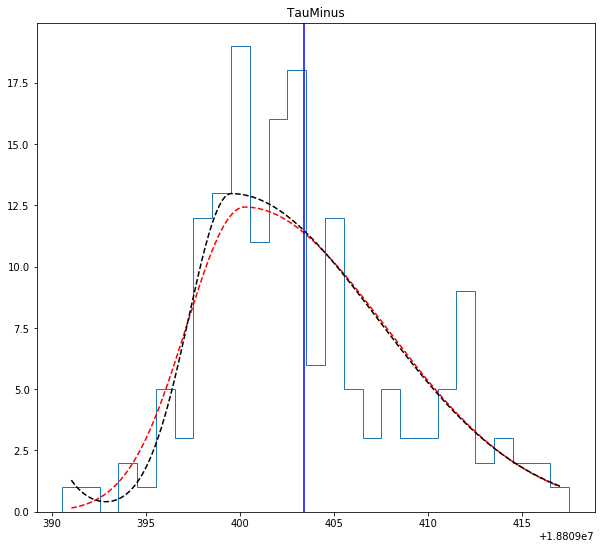

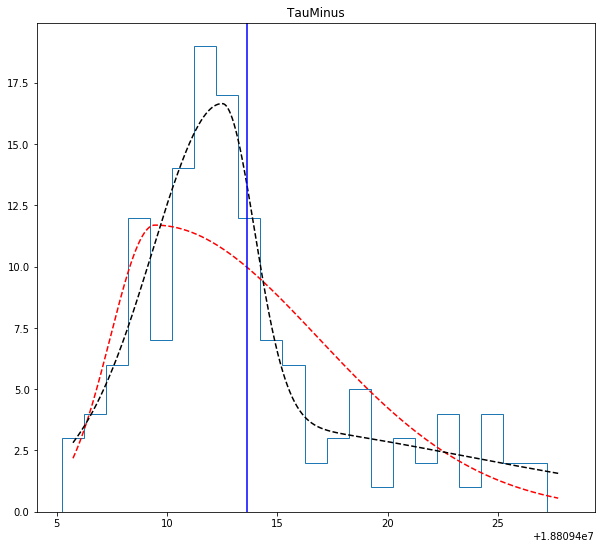

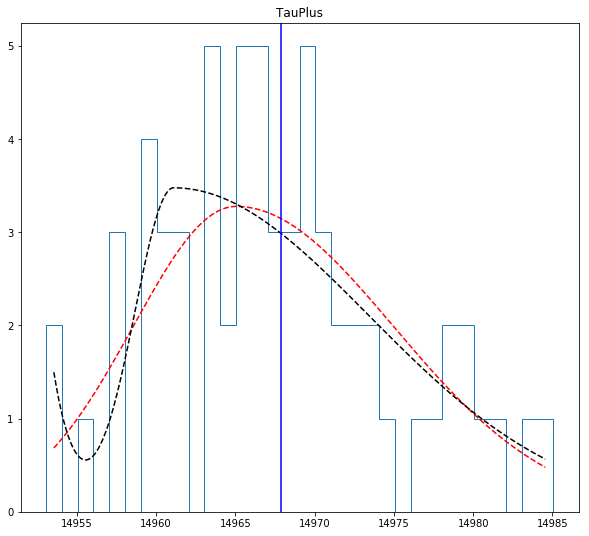

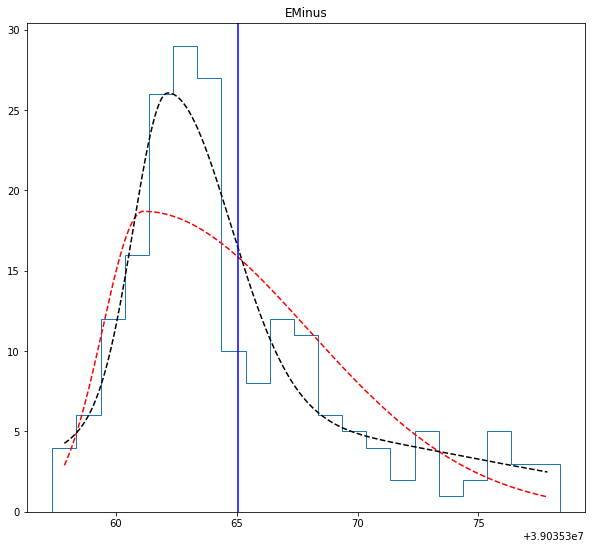

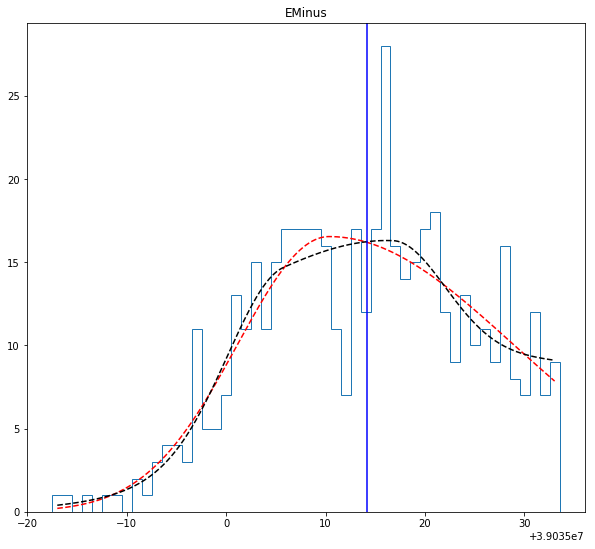

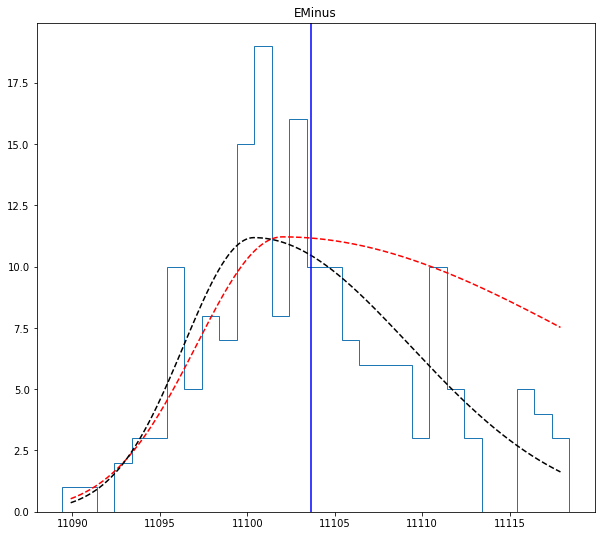

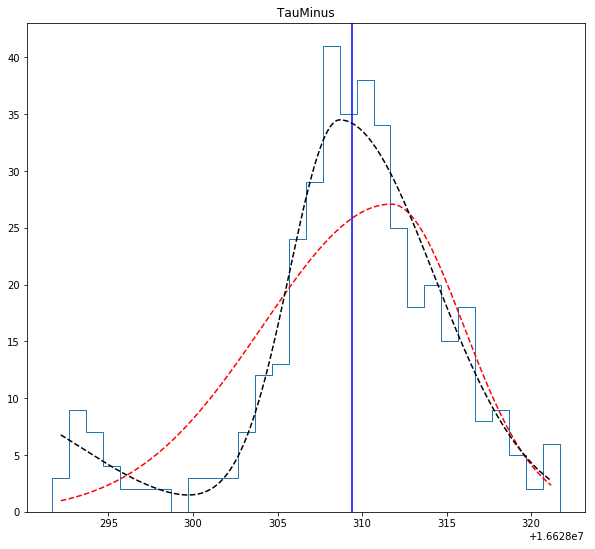

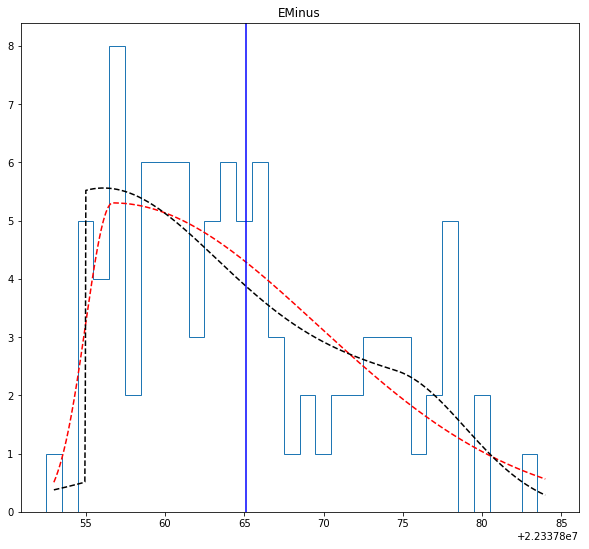

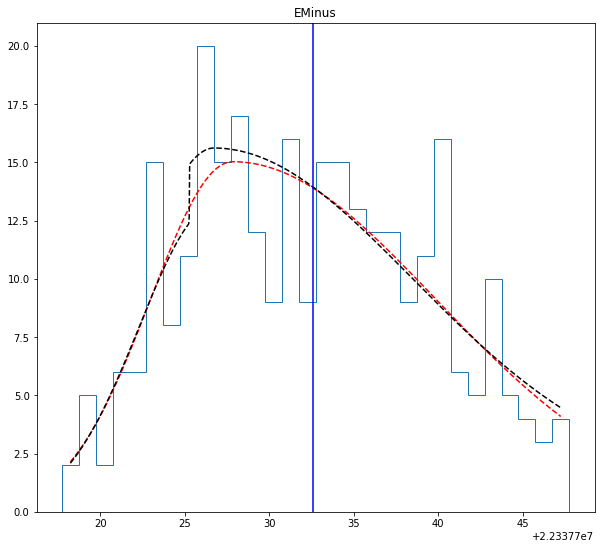

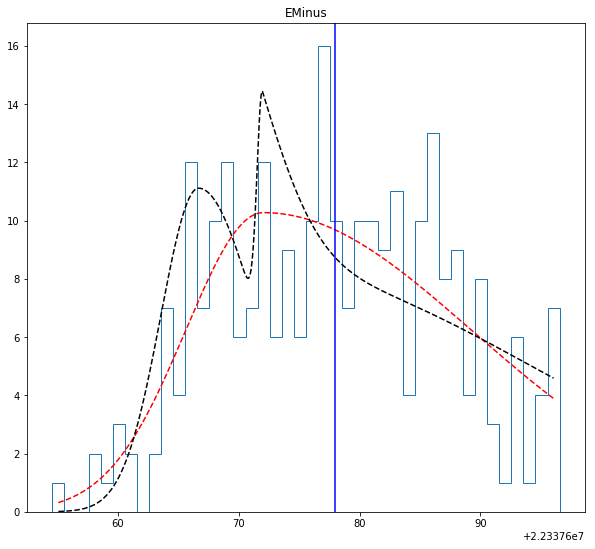

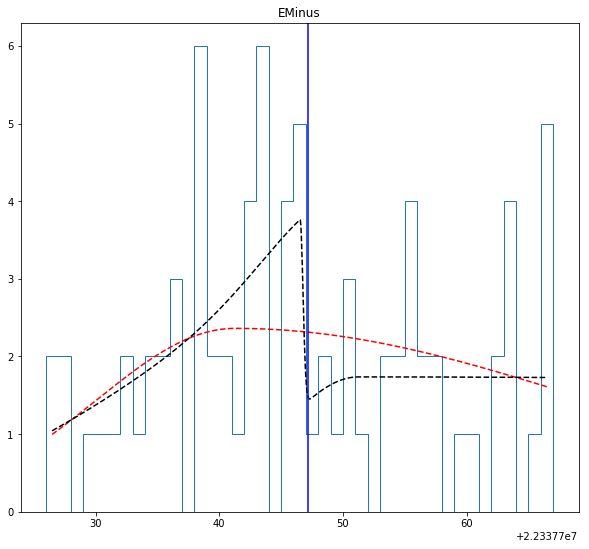

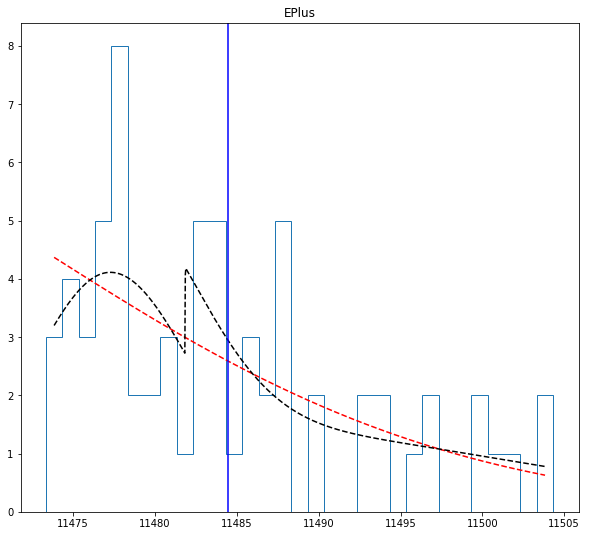

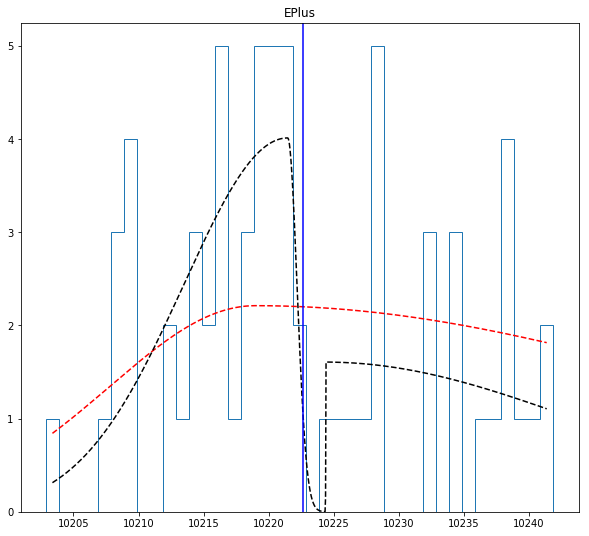

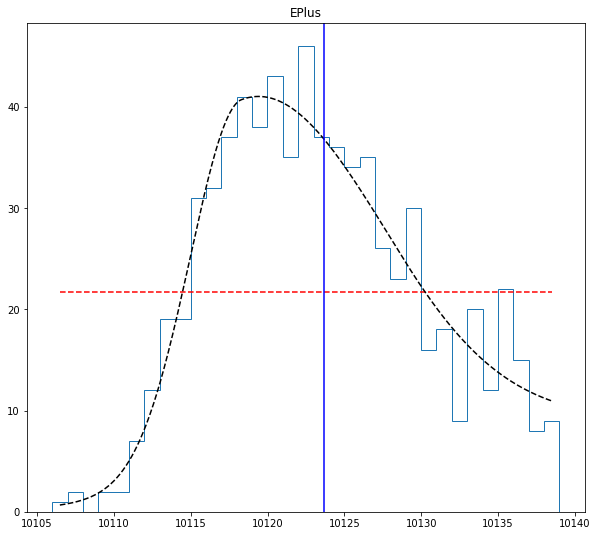

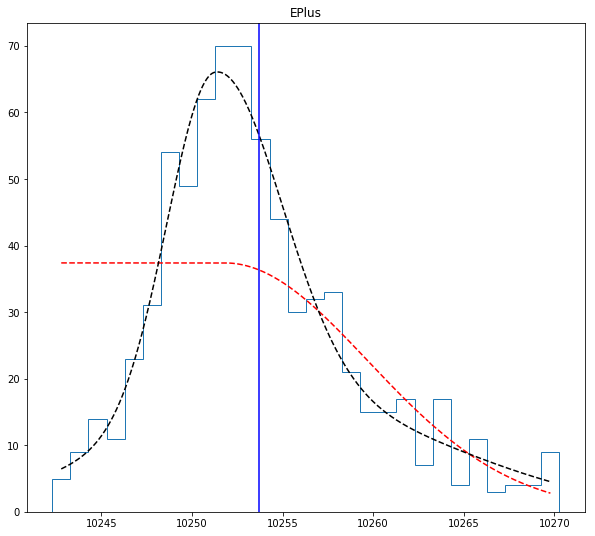

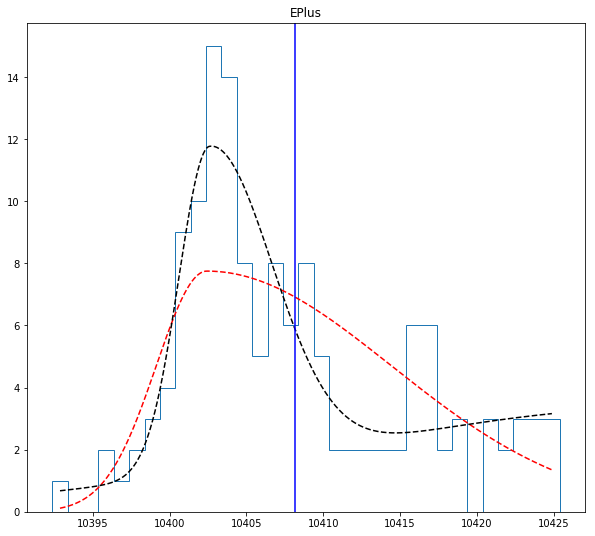

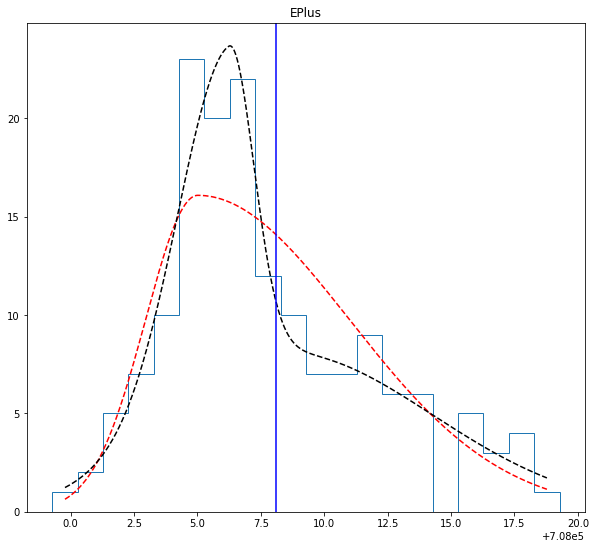

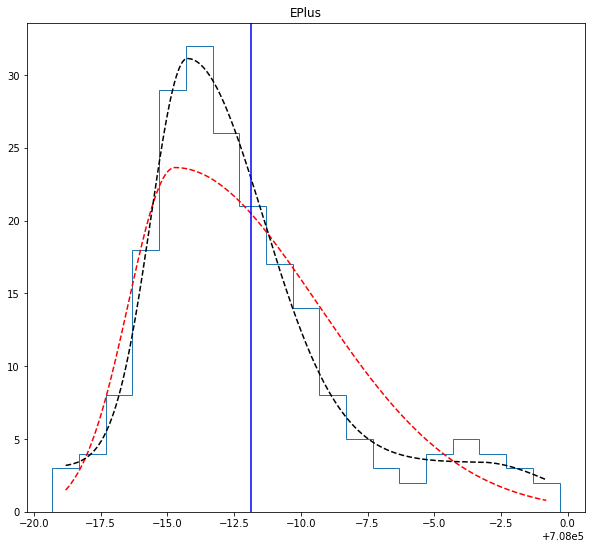

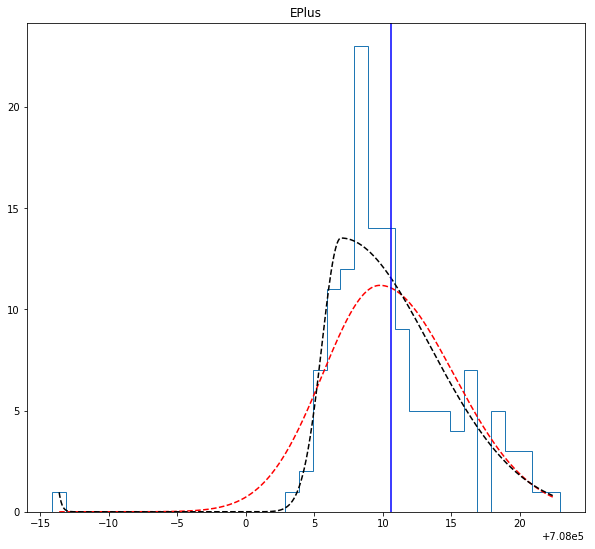

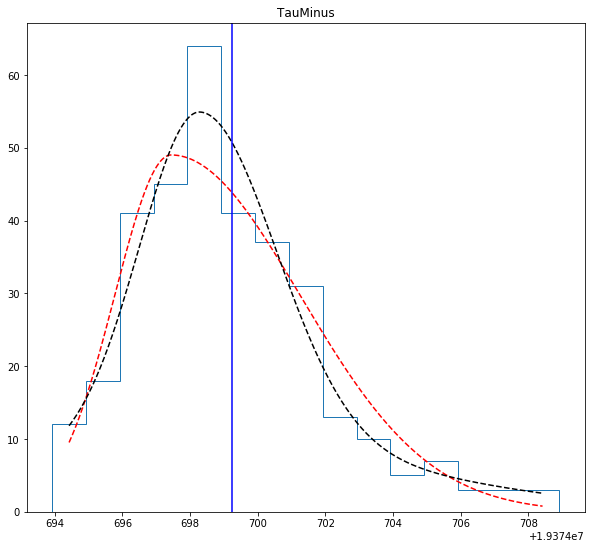

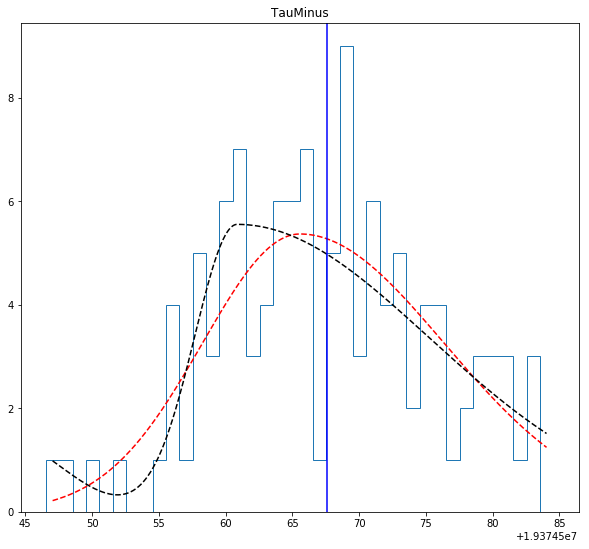

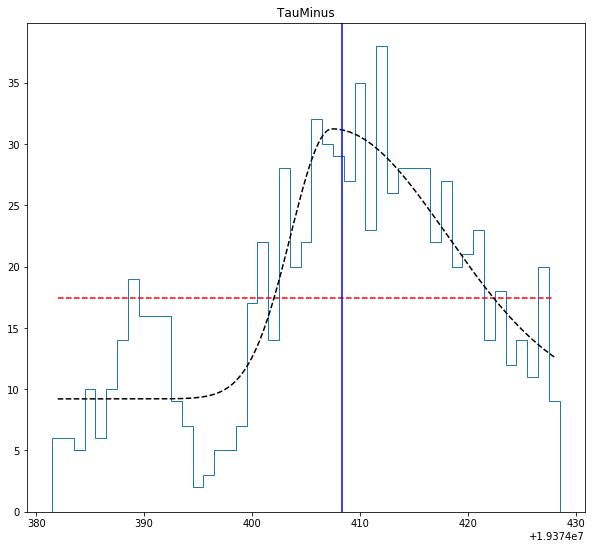

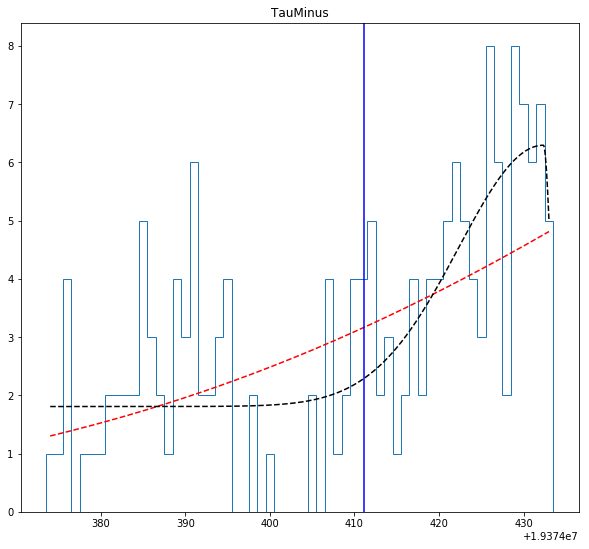

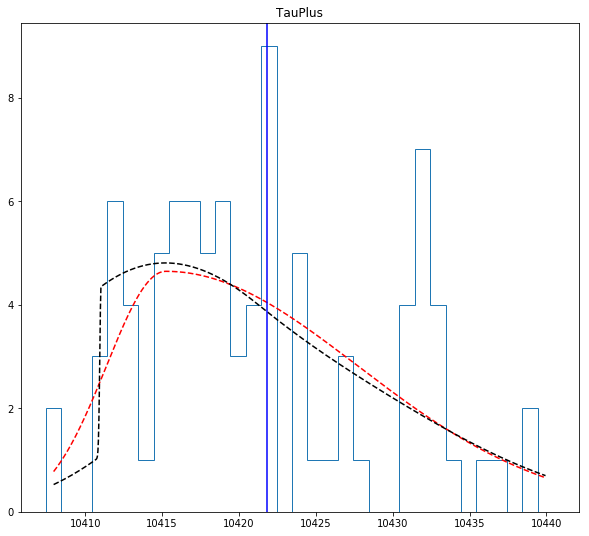

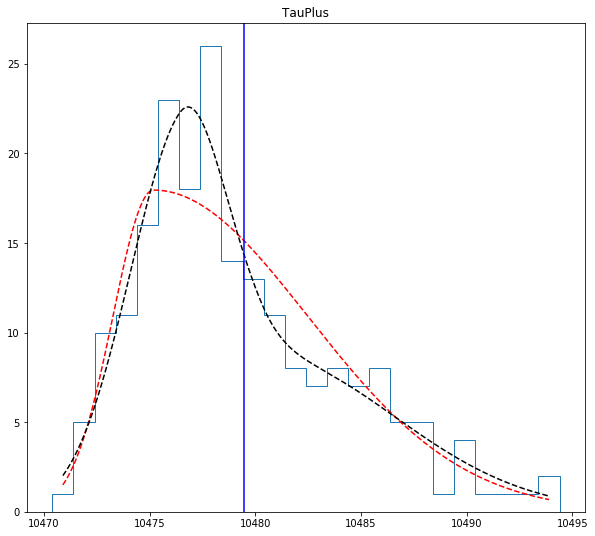

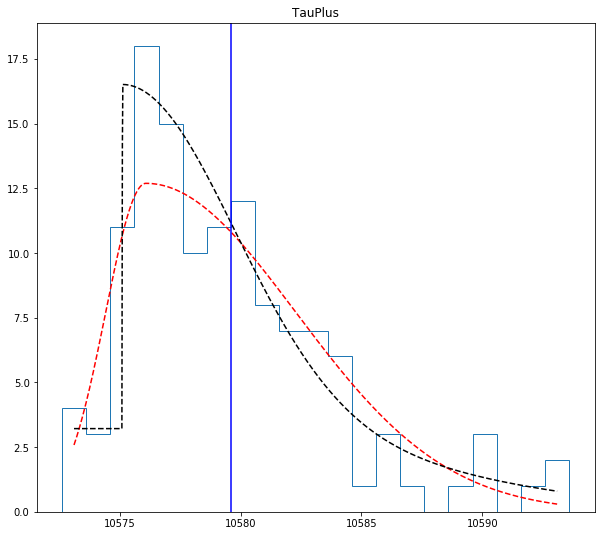

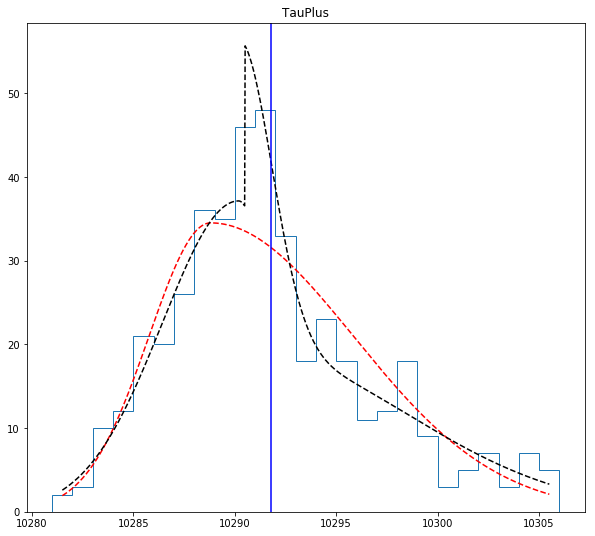

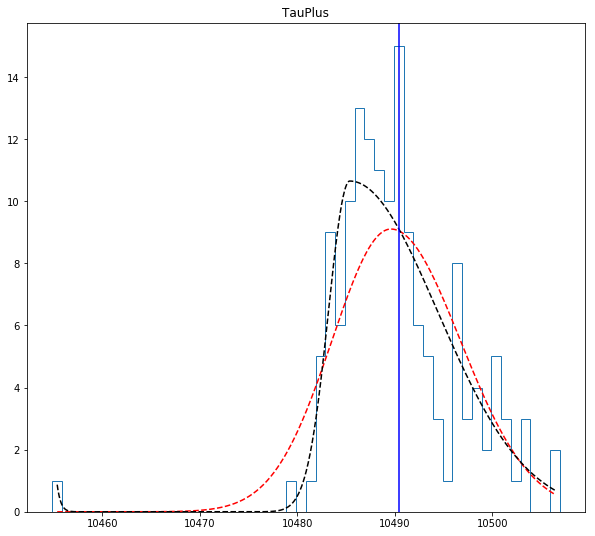

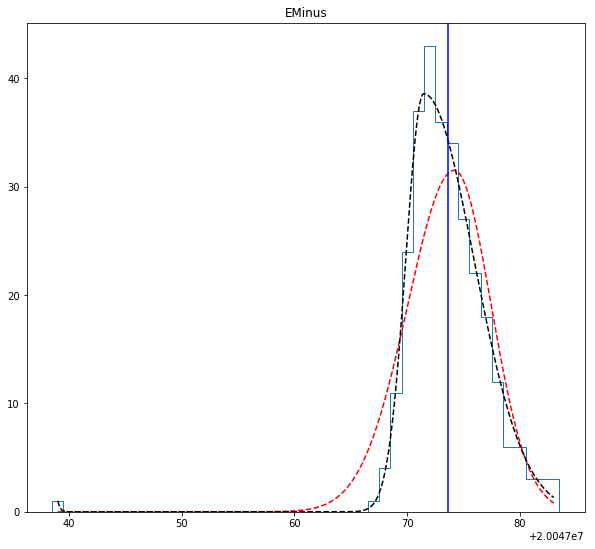

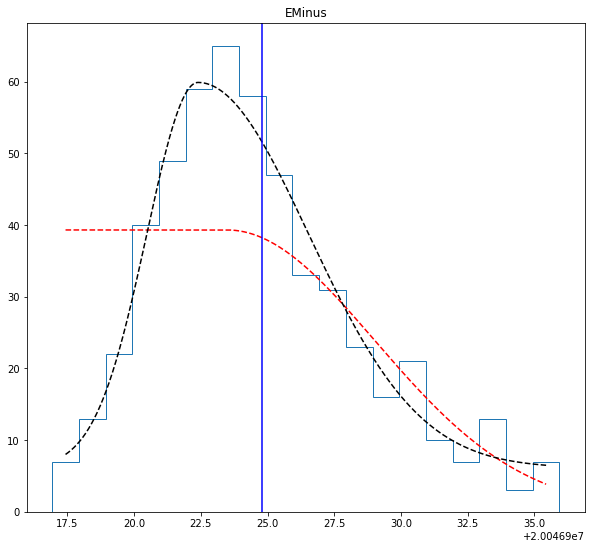

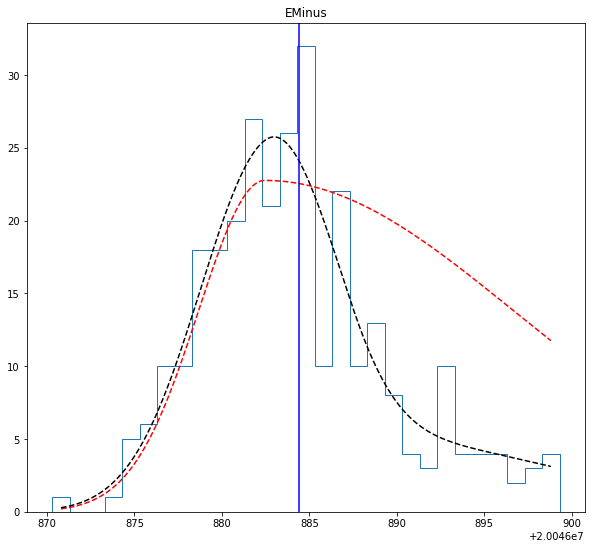

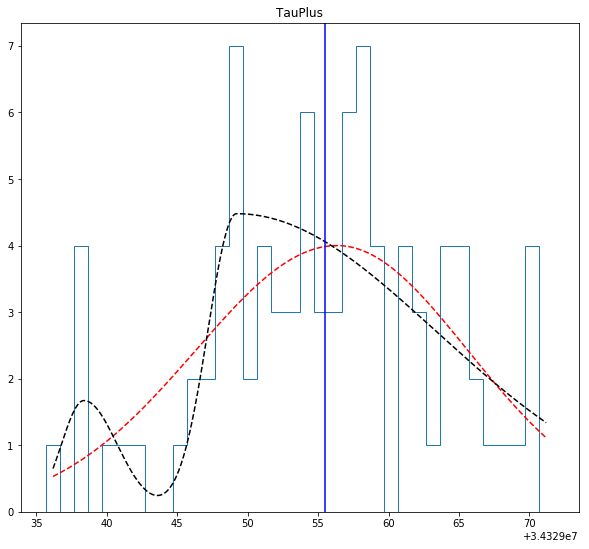

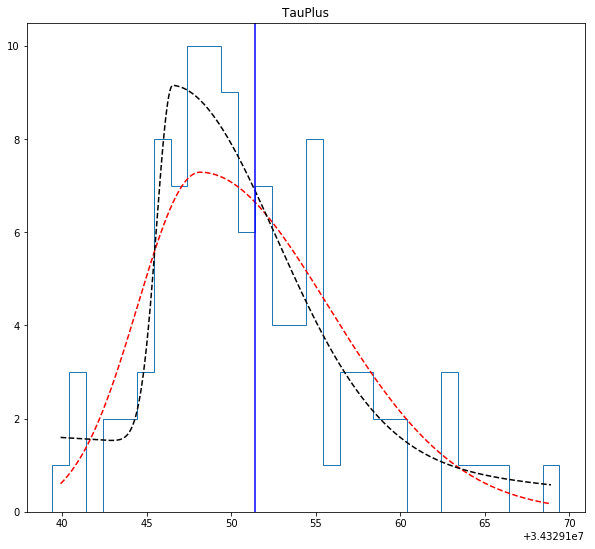

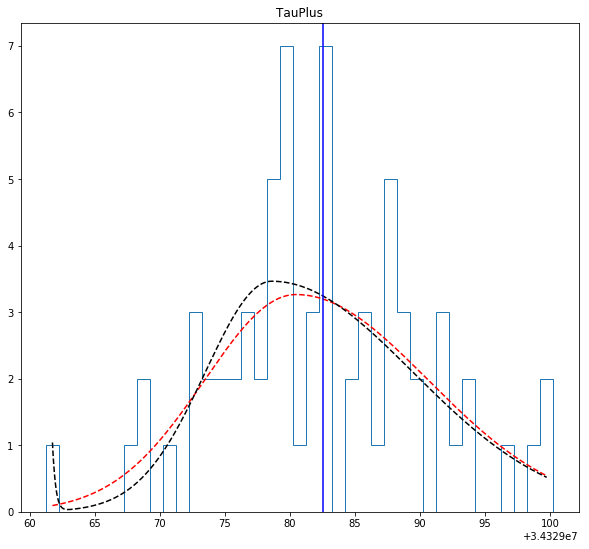

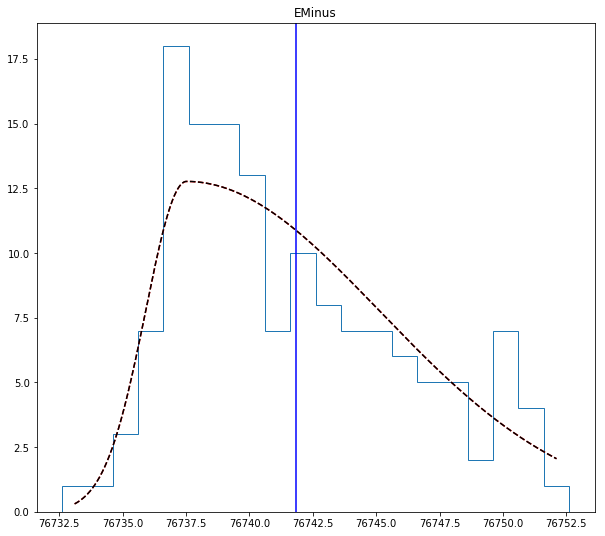

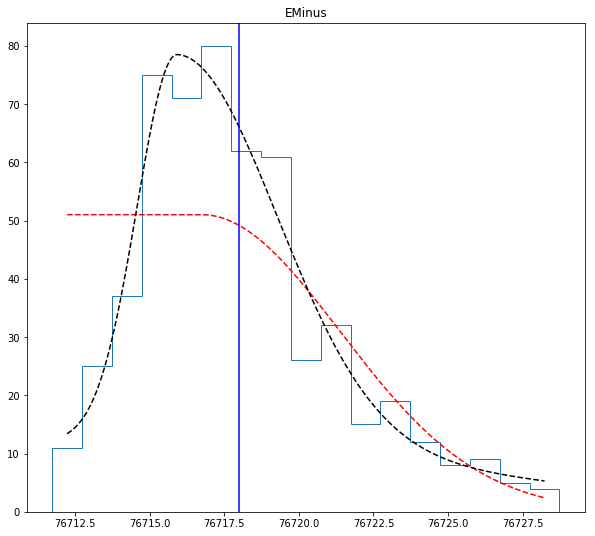

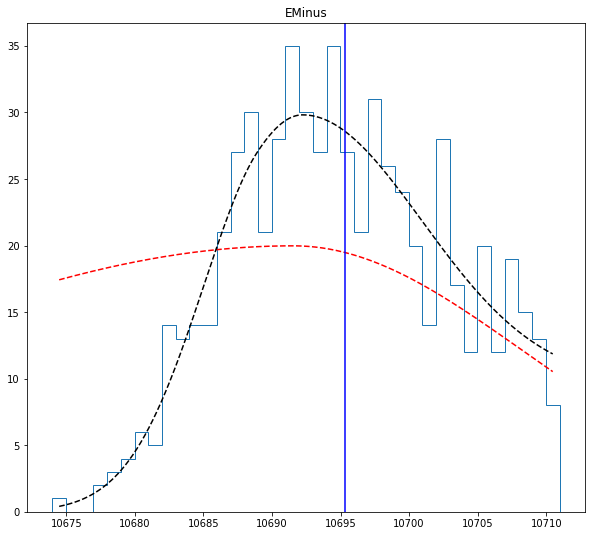

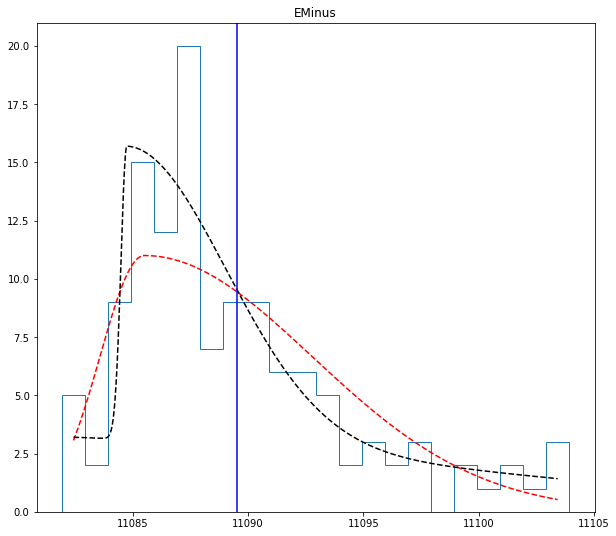

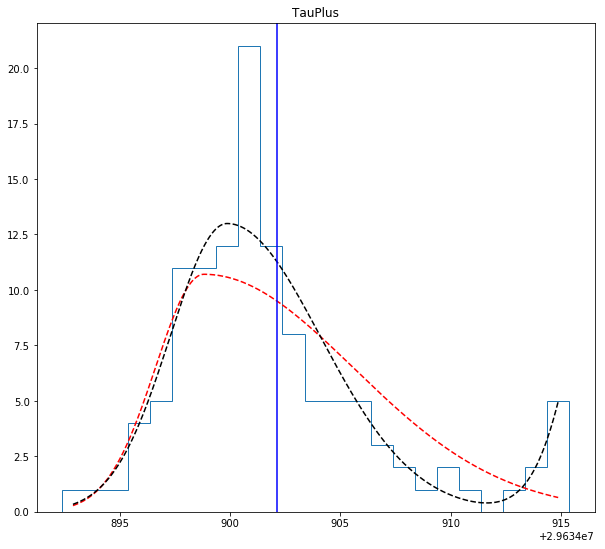

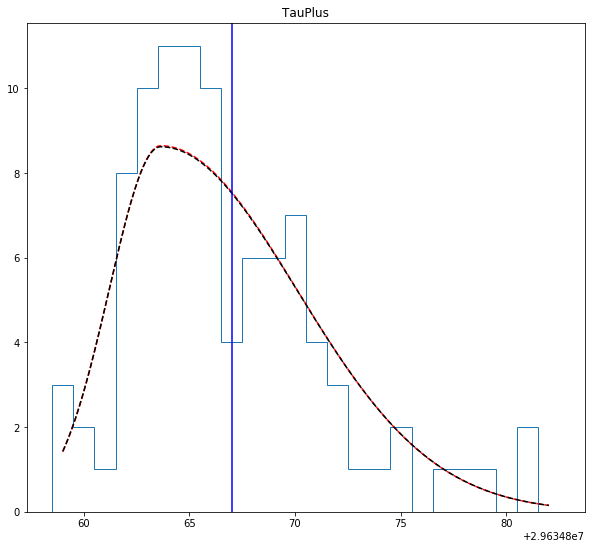

In [3]:
gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

tau_timeDiff = ([])
tau_pVal = ([])

e_timeDiff = ([])
e_pVal = ([])
    
for i in range(90, 100):
    file = dataio.I3File('/data/p-one/akatil/step_4_medium_water/NuTau_NuE_20Events/step_4_'+str(i)+'_medium_water_custom_mDOM_noise.i3.gz')

    f = 1
    for frame in file:
        print('frame num - ', f)
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
        
        '''
        Removing NCC interations of the neutrino
        '''
        
        if lepton.type == 12 or lepton.type == -12 or lepton.type == 16 or lepton.type == -16:
            continue
        
        '''
        Lepton position
        '''
        lepton_pos = lepton.pos
        x_lepton_pos = lepton_pos.x
        y_lepton_pos = lepton_pos.y
        z_lepton_pos = lepton_pos.z

        mcpeMap = frame['MCPESeriesMap']
        noiseMap = frame['NoiseSeriesMap']

        #print('Finding OM Positions and time residuals')


        #looping through doms that have physics hits
        for omkey in mcpeMap.keys():
            oKey = omgeo.get(omkey)
            
            '''
            Dom Positons
            '''
            domPos = oKey.position
            x_dom = domPos.x
            y_dom = domPos.y
            z_dom = domPos.z
            
            '''
            Distance between event vertex and DOM
            '''
            distance = np.sqrt((x_dom - x_lepton_pos)**2 + (y_dom - y_lepton_pos)**2 +
                               (z_dom - z_lepton_pos)**2)
            
            #removing doms with distances > 100m from the event vertex
            if distance > 200:
                continue

            '''
            Obtaining the timeList
            '''
            noise_mcpeList = noiseMap[omkey]
            noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            mcpeList = mcpeMap[omkey]
            timeList = np.array([mcpe.time for mcpe in mcpeList])
            tot_timeList = np.append(timeList, noise_timeList)
            
            
            '''
            Removing DOMs with hits less than 100
            '''
            if len(tot_timeList) < 100:
                continue
            
            
            '''
            Calculating the mean and removing the tails
            '''
            
            timeList = timeList[timeList < min(timeList)+30]
        
            mean_physicsHits = timeList.mean()
            mean_tot = tot_timeList.mean()
            
            select_time = tot_timeList[(tot_timeList > mean_physicsHits-50) & (tot_timeList < mean_physicsHits+50)]
            new_mean = select_time.mean()
            
            bins = np.arange(min(select_time), max(select_time), 1)
            max_hitTimes = select_time[(select_time > (new_mean-40))&(select_time < (new_mean+40))]
            
            z = stats.zscore(max_hitTimes)
            #using zscore to remove the effect of outliers from the analysis]
            max_hitTimes = max_hitTimes[(z < 1.2)]
            new_mean = max_hitTimes.mean()
            
            if len(max_hitTimes) < 10:
                continue
            
            '''
            Histogramming the data from simulation
            '''

            bins = np.arange(min(max_hitTimes), max(max_hitTimes), 1)
            num, bin_edges = np.histogram(max_hitTimes, bins=bins)
            bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
            
            '''
            Removing hits for DOMs that have more than 200 hits in 1 second bin.
            '''
            if max(num) > 175 or len(num) == 0:
                continue
            
            print('LOG LIKELIHOOD')
            
            '''
            Removing DOMs that don't have less than 8 non zero bins 
            '''
            if len(num[num>0]) <= 8:
                continue
                
            
            '''
            Fitting bifurcated Gaussian and double bifurcated gaussian to the mcpe hit time distributions
            for both tau and electron.
            '''

            nll = lambda *args: log_likelihood_biGauss(*args)
            initial_biGauss = np.array([new_mean, 20, 1, 10])
            #bnds_biGauss = ((min(bin_centers), mean_timeArrival), (0, 20), (0, 2), (0, max(num)), (mean_timeArrival, max(bin_centers)), (0, 20), (0, 2), (0, max(num)))
            
            #print(len(num), len(initial_biGauss), initial_biGauss)
            bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 1e3), (0, 100), (0, 1e6))
            soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss, args=(num, bin_centers), 
                                    method='Powell', bounds = bnds_biGauss)
            
            nll = lambda *args: log_likelihood_doublePeak(*args)
            initial_doublePeak = np.array([min(bin_centers), 20, 1, 10, new_mean, 20, 1, 10])
            bnds_doublePeak = ((min(bin_centers), new_mean), (0, 1e3), (0, 100), (0, 1e6),
                               (new_mean, max(bin_centers)), (0, 1e3), (0, 100), (0,1e6))
            soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak, args=(num, bin_centers),
                                       method='Powell',bounds=bnds_doublePeak)
            
            '''
            Removing DOMs whose minimization is not successful
            '''
            if soln_biGauss.success == False or soln_doublePeak.success == False:
                continue
            
            '''
            Calculating the Likelihood ratio for bifurcated gaussian and double double bifurcated gaussian
            '''
            LR_biGauss = likelihood_ratio_biGauss(bin_centers[num>0], num[num>0], soln_biGauss.x[0], 
                                             soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
            LR_doublePeak = likelihood_ratio_doublePeak(bin_centers[num>0], num[num>0], soln_doublePeak.x[0], soln_doublePeak.x[1], 
                                             soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4], 
                                             soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])

            
            '''
            Calculating the p-value using the likelihood ratio
            '''
            pVal_biGauss = chi2.sf(LR_biGauss, len(num) - 4)
            pVal_doublePeak = chi2.sf(LR_doublePeak, len(num) - 8)
            
            if pVal_biGauss != pVal_biGauss:
                print('BiGauss gives not well defined - ', str(lepton.type))
                print('Minimisation - ', soln_biGauss.success)
                print('Degrees of Freedom - ', len(num) - 4)
                print('Log Likelihood - ', LR_biGauss)
            if pVal_doublePeak != pVal_doublePeak:
                print('double peak gives not well defined - ', str(lepton.type))
                print('Minimisation - ', soln_doublePeak.success)
                print('Degrees of Freedom - ', len(num) - 8)
                print('Log Likelihood - ', LR_doublePeak)
            
            
            '''
            (x, y) values for the fit
            '''
            x = np.linspace(min(bin_centers), max(bin_centers), 1000)
            #x = np.linspace(0, max(bin_centers)+1e5, 1000)
            y_biGauss = biGauss(x, soln_biGauss.x[0], 
                                             soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
            y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1], 
                                             soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4], 
                                             soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])
            
            '''
            Calculating the time difference and p-value ratio of bigauss and double peak
            '''
            timeDifference_doublePeak = soln_doublePeak.x[4] - soln_doublePeak.x[0]
            pVal_ratio = pVal_doublePeak/pVal_biGauss
            
            
            
            '''
            Removing terrible fits
            '''
            if abs(timeDifference_doublePeak) > 100:
                continue
        
            amp1 = soln_doublePeak.x[3]
            amp2 = soln_doublePeak.x[7]
            if amp1/amp2 < 1/4 and amp1/amp2 > 4:
                continue
                
            if amp1 < 0 or amp2 < 0:
                print('Error in amp')
                continue
                
            
            '''
            plot mcpe time distributions obtained using simulations and the fits
            '''
            plt.figure(figsize=(10,9))
            _ = plt.hist(max_hitTimes, bins=bins, histtype='step')
            plt.title(str(lepton.type))
            plt.plot(x, y_biGauss, '--', c = 'r')
            plt.plot(x, y_doublePeak, '--', c = 'k')
            plt.axvline(new_mean, c = 'b')
            
           
            
            '''
            Separating the time difference calculated above and appending the values
            '''
            
            '''
            Tau
            '''
            if lepton.type == 15 or lepton.type == -15:
                tau_timeDiff = np.append(tau_timeDiff, timeDifference_doublePeak)
                tau_pVal = np.append(tau_pVal, pVal_ratio)
                #plt.title('E')
                
            '''
            Electron
            '''
            
            if lepton.type == 11 or lepton.type == -11:
                e_timeDiff = np.append(e_timeDiff, timeDifference_doublePeak)
                e_pVal = np.append(e_pVal, pVal_ratio)
                #plt.title('Tau')
                
            
            print('P-VAL CALCULATED')
            
            
        '''
        print(tot_timeList)
        
        bins = np.arange(min(tot_timeList), min(tot_timeList)+41, 1)
        num, bin_edges, _ = plt.hist(tot_timeList, bins=bins, histtype='step')
        plt.title('Tau')
        '''
        f = f+1
#print(tot_timeList)